# get tn data

- agglom-extent
- dtm
- station data
- station location
- landsat tiles


# agglomeration extent

In [1]:
# adige valley shape file
# quick tool to get shapefile https://www.keene.edu/campus/maps/tool/
# actually better https://geojson.io/#map=2/0/20


In [ ]:
#import required packages
import os, json
import geopandas as gpd
from ipywidgets import widgets
from ipyleaflet import Map, GeoData, basemaps, LayersControl, ScaleControl, FullScreenControl, WidgetControl
from ipywidgets import widgets, IntSlider, jslink
#get shapefile name list
shp_path = './data/raw/adige_valley/'
shpList = [x[:-4] for x in os.listdir(shp_path) if x[-3:]=='shp']

#dropdown widget
selDrop = widgets.Dropdown(
    options=shpList,
    value=shpList[0],
    description='Shapefile:',
    disabled=False,
)

display(selDrop)

#button widget
selBot = widgets.Button(
    description='Select shapefile',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Select shapefile',
    icon='check'
)

display(selBot)


#map object
m = Map(center=(46.0748, 11.1217), zoom = 10, 
        basemap = basemaps.OpenTopoMap)

zoom_slider = IntSlider(description='Zoom level:', min=0, max=15, value=12)
jslink((zoom_slider, 'value'), (m, 'zoom'))
widgetControl = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widgetControl)

m.add_layer(basemaps.OpenStreetMap.Mapnik)
m.add_control(ScaleControl(position='bottomleft'))
m.add_control(FullScreenControl(position='topright'))
m.add_control(LayersControl())

selShp = 'POLYGON' #selDrop.value
print(shp_path+'POLYGON'+'.shp')
selDf = gpd.read_file(shp_path+'POLYGON'+'.shp')


geoDf = selDf.to_crs(4326)
lonCent = (geoDf.bounds.maxx + geoDf.bounds.minx).mean()/2
latCent = (geoDf.bounds.maxy + geoDf.bounds.miny).mean()/2

m.center = (latCent,lonCent)
geoData = GeoData(geo_dataframe=geoDf, name=selShp)
m.add_layer(geoData)
    
display(m)

# #show map function
# def showMap(selShp):

#     selDf = gpd.read_file(shp_path+selShp+'.shp')


#     geoDf = selDf.to_crs(4326)
#     lonCent = (geoDf.bounds.maxx + geoDf.bounds.minx).mean()/2
#     latCent = (geoDf.bounds.maxy + geoDf.bounds.miny).mean()/2

#     m.center = (latCent,lonCent)
#     geoData = GeoData(geo_dataframe=geoDf, name=selShp)
#     m.add_layer(geoData)

# #on click function
# def on_button_clicked(b):
#     showMap(selDrop.value)

# selBot.on_click(on_button_clicked)

Dropdown(description='Shapefile:', options=('POLYGON',), value='POLYGON')

Button(button_style='success', description='Select shapefile', icon='check', style=ButtonStyle(), tooltip='Sel…

# currently there is an issue with pandas installation
https://github.com/geopandas/geopandas/issues/2556

so going to skip for now the reandenring and just use conda env as compiled with uhi_ch1


In [2]:
gpd

<module 'geopandas' from '/home/beber/miniconda3/envs/uhi_ch1/lib/python3.7/site-packages/geopandas/__init__.py'>

In [4]:
gpd.show_versions()


SYSTEM INFO
-----------
python     : 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53)  [GCC 9.4.0]
executable : /home/beber/miniconda3/envs/uhi_ch1/bin/python
machine    : Linux-5.15.0-56-generic-x86_64-with-debian-bookworm-sid

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : 3.8.1
GEOS lib   : /home/beber/miniconda3/envs/uhi_ch1/lib/libgeos_c.so
GDAL       : 2.4.4
GDAL data dir: /home/beber/miniconda3/envs/uhi_ch1/share/gdal
PROJ       : 7.0.0
PROJ data dir: /home/beber/miniconda3/envs/uhi_ch1/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.6.3
pandas     : 1.0.5
fiona      : 1.8.9.post2
numpy      : 1.16.6
shapely    : 1.7.1
rtree      : 1.0.1
pyproj     : 2.6.1.post1
matplotlib : 3.3.4
mapclassify: None
pysal      : None
geopy      : 2.3.0
psycopg2   : None


In [1]:
import geopandas as gpd

In [2]:
selDf = gpd.read_file('./data/raw/agglom-extent/agglom-extent.shp')#, engine="pyogrio")

In [3]:
selDf

,FID,geometry
0,0,"POLYGON ((11.05748 45.92775, 11.08023 45.95449..."


In [4]:
# as environemnt is working, for time being keep as it is now

In [ ]:
gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'), engine="pyogrio")


## dtm tn 


## landsat tiles without clouds:

In [15]:
import pandas as pd

lsat_tiles_list = pd.read_csv('./data/raw/landsat-tiles.csv', header= None)
lsat_tiles_list

,0
0,LC09_L1TP_193028_20220608_20220608_02_T1
1,LC09_L1TP_192028_20220617_20220618_02_T1
2,LC08_L1TP_192028_20220625_20220706_02_T1
3,LC08_L1TP_193028_20220702_20220708_02_T1
4,LC09_L1TP_192028_20220703_20220703_02_T1
5,LC08_L1TP_192028_20220711_20220722_02_T1
6,LC08_L1TP_193028_20220718_20220726_02_T1
7,LC09_L1TP_192028_20220719_20220719_02_T1
8,LC09_L1TP_193028_20220726_20220726_02_T1
9,LC08_L1TP_193028_20220803_20220806_02_T1


In [28]:
#extract Path Row Numbers
lsat_tiles_list['PathRow']=lsat_tiles_list[0].str.extract('_(\d{6})_')

#extract date of acquisition
lsat_tiles_list['date']=lsat_tiles_list[0].str.extract('_(\d{8})_')
lsat_tiles_list['date']=pd.to_datetime(lsat_tiles_list['date'],  format='%Y%m%d')

lsat_tiles_list


,0,PathRow,date
0,LC09_L1TP_193028_20220608_20220608_02_T1,193028,2022-06-08
1,LC09_L1TP_192028_20220617_20220618_02_T1,192028,2022-06-17
2,LC08_L1TP_192028_20220625_20220706_02_T1,192028,2022-06-25
3,LC08_L1TP_193028_20220702_20220708_02_T1,193028,2022-07-02
4,LC09_L1TP_192028_20220703_20220703_02_T1,192028,2022-07-03
5,LC08_L1TP_192028_20220711_20220722_02_T1,192028,2022-07-11
6,LC08_L1TP_193028_20220718_20220726_02_T1,193028,2022-07-18
7,LC09_L1TP_192028_20220719_20220719_02_T1,192028,2022-07-19
8,LC09_L1TP_193028_20220726_20220726_02_T1,193028,2022-07-26
9,LC08_L1TP_193028_20220803_20220806_02_T1,193028,2022-08-03


<AxesSubplot:>

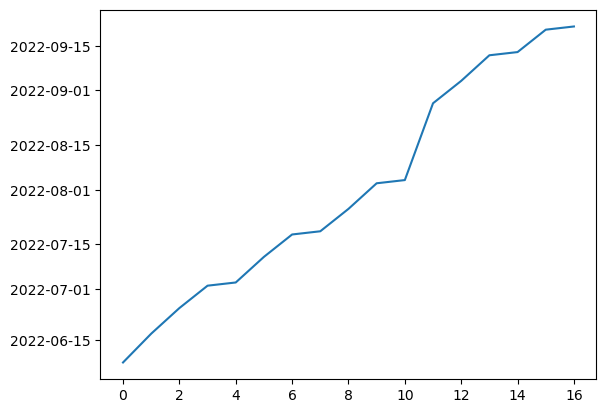

In [33]:
lsat_tiles_list['date'].plot()

In [35]:
# average passing tim eof landsat 8 and 9 over Trento ( 46.066667, 11.116667) in descending mode (day) is about

acq_time = '09:58:00'

In [36]:
# extract temperature of that time form availabel stations